# OBJECTIVE #

1.   <b>APPLYING RANDOM FOREST WITH TFIDF VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [6]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.3,shuffle=False)

In [8]:
vectorizer=TfidfVectorizer(min_df=2)#building the vertorizer with word counts equal and more then 2
train_tfidf=vectorizer.fit_transform(x_train)#fitting the model on training data
print(train_tfidf.shape)


(70000, 16382)


In [9]:
test_tfidf=vectorizer.transform(x_test)#fitting the bow model on test data
print("shape of x_test after tfidf vectorization ",test_tfidf.shape)

shape of x_test after tfidf vectorization  (30000, 16382)


In [10]:
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[61,64,68,73,77,80],'n_estimators':[21,30,35,40,45,50]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


In [11]:
%%time
model.fit(train_tfidf, y_train)#fiitting the training data


CPU times: user 11.2 s, sys: 284 ms, total: 11.5 s
Wall time: 26min 40s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [61, 64, 68, 73, 77, 80], 'n_estimators': [21, 30, 35, 40, 45, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [20]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=73, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=21, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [21]:
print(model.score(test_tfidf,y_test))#checking the score on test_Data 

0.9376672494380418


In [22]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,8.207892,0.125787,0.942826,0.968657,61,21,"{'max_depth': 61, 'n_estimators': 21}",21,0.947683,0.971511,...,0.943117,0.967134,0.944341,0.967812,0.936761,0.966325,4.103327,0.004299,0.003553,0.002001
1,11.751353,0.175003,0.942623,0.968801,61,30,"{'max_depth': 61, 'n_estimators': 30}",31,0.946783,0.971511,...,0.944164,0.967464,0.944132,0.968003,0.936369,0.967719,5.789906,0.009467,0.003521,0.001497
2,13.598304,0.196765,0.942794,0.968604,61,35,"{'max_depth': 61, 'n_estimators': 35}",22,0.947140,0.971103,...,0.943736,0.967164,0.944137,0.968183,0.937417,0.966927,6.748325,0.010340,0.003227,0.001574
3,15.517566,0.228227,0.942471,0.968346,61,40,"{'max_depth': 61, 'n_estimators': 40}",35,0.946612,0.970558,...,0.944078,0.968395,0.943900,0.966766,0.935755,0.966388,7.653642,0.008082,0.003663,0.001604
4,17.657933,0.251955,0.942571,0.968759,61,45,"{'max_depth': 61, 'n_estimators': 45}",33,0.946679,0.971693,...,0.943736,0.967779,0.944114,0.968014,0.936270,0.967026,8.881016,0.009133,0.003481,0.001637
5,19.466890,0.272821,0.942472,0.969249,61,50,"{'max_depth': 61, 'n_estimators': 50}",34,0.946831,0.971784,...,0.943907,0.968455,0.943814,0.967362,0.936484,0.967646,9.919978,0.014856,0.003465,0.001803
6,8.745539,0.132947,0.942786,0.970711,64,21,"{'max_depth': 64, 'n_estimators': 21}",23,0.947392,0.974109,...,0.944121,0.969011,0.945129,0.968826,0.935909,0.969342,4.290776,0.003738,0.003944,0.002111
7,12.032980,0.176906,0.943092,0.970263,64,30,"{'max_depth': 64, 'n_estimators': 30}",14,0.948131,0.972512,...,0.943554,0.968470,0.944465,0.969289,0.936956,0.969342,5.994120,0.008506,0.003625,0.001558
8,14.123110,0.203084,0.942750,0.970345,64,35,"{'max_depth': 64, 'n_estimators': 35}",24,0.947268,0.972057,...,0.943521,0.969463,0.944379,0.970159,0.936570,0.968548,7.011075,0.009581,0.003533,0.001288
9,16.386997,0.228492,0.942637,0.970659,64,40,"{'max_depth': 64, 'n_estimators': 40}",29,0.947216,0.972467,...,0.943993,0.969237,0.944066,0.969888,0.936289,0.969595,8.340040,0.010531,0.003638,0.001350


In [0]:

results['mean_test_score']=results['mean_test_score']*100
results=results.round(decimals=2)
results['cv_error_score']=100-results['mean_test_score']

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_n_estimators','cv_error_score'	)

In [25]:
test_score_heatmap

param_n_estimators,21,30,35,40,45,50
param_max_depth,,,,,,
61,5.72,5.74,5.72,5.75,5.74,5.75
64,5.72,5.69,5.72,5.74,5.73,5.73
68,5.70,5.74,5.74,5.73,5.75,5.74
73,5.64,5.70,5.70,5.69,5.71,5.71
77,5.66,5.66,5.67,5.68,5.68,5.70
80,5.67,5.67,5.66,5.68,5.67,5.68


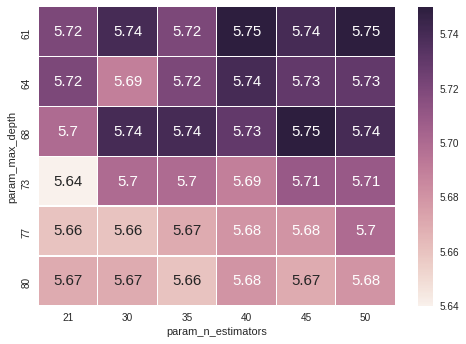

In [26]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [27]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=73, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=21, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=73 AND N_ESTIMATORS=21

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

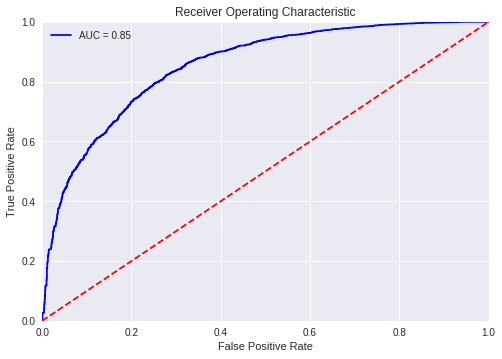

In [29]:
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5},max_depth=73 ,n_estimators=21)
rf.fit(train_tfidf,y_train)#fitting the model 
probs = rf.predict_proba(test_tfidf)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  85.30101633953345


In [31]:
z=rf.feature_importances_
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_features=np.take(vectorizer.get_feature_names(),a[16360:])#taking last features as they are of very high importance 

shape of wieght vector is: (16382,)


In [32]:
print(top_features)#printing the top_features
top=list(top_features)

['return' 'refund' 'receiv' 'poor' 'gross' 'money' 'best' 'thought' 'tast'
 'horribl' 'mayb' 'stale' 'love' 'threw' 'wast' 'bad' 'worst' 'terribl'
 'aw' 'would' 'great' 'disappoint']


# REPRESENTING TOP IMPORTANT FEATURES USING WORDCLOUD LIBRARY

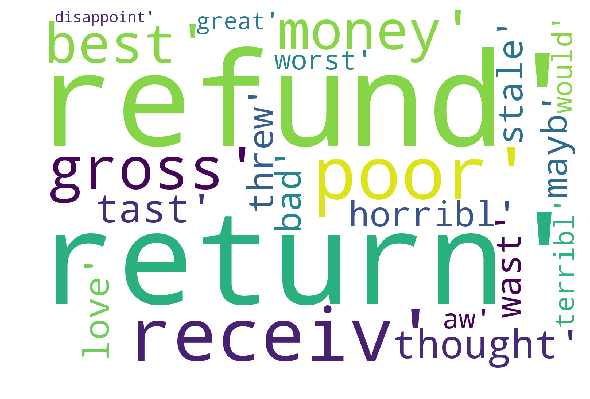

In [33]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(top)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 88.443%
Precision on test set: 0.884
Recall on test set: 0.999
F1-Score on test set: 0.938
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



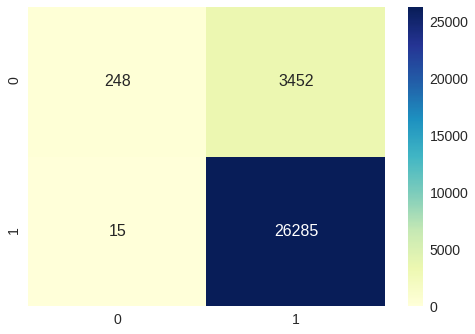

In [34]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
y_pred = rf.predict(test_tfidf) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap="YlGnBu")


# BOW VECTORIZATION FOR RANDOM  FOREST IS COMPLETED 

# OBJECTIVE #

1.   <b>APPLYING GBDT WITH TFIDF VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [35]:
from xgboost import XGBClassifier
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
xg=XGBClassifier(n_jobs=-1)
tuned_parameters=[{'max_depth':[11,15,20,24,27,30],'n_estimators':[21,30,35,40,45,50]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(xg, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model



CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [36]:
%%time
model.fit(train_tfidf, y_train)#fiitting the training data


CPU times: user 2min 51s, sys: 362 ms, total: 2min 51s
Wall time: 1h 12min 21s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [11, 15, 20, 24, 27, 30], 'n_estimators': [21, 30, 35, 40, 45, 50]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [43]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [60]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results.head()#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,14.193161,0.189327,0.946074,0.959469,11,21,"{'max_depth': 11, 'n_estimators': 21}",36,0.948659,0.961775,...,0.948009,0.959019,0.947344,0.958365,0.940477,0.957193,6.470520,0.009445,0.002946,0.001688
1,20.153732,0.204038,0.947127,0.962851,11,30,"{'max_depth': 11, 'n_estimators': 30}",34,0.950135,0.965270,...,0.948389,0.962619,0.948236,0.961843,0.942013,0.960995,9.047792,0.012643,0.002760,0.001471
2,23.310932,0.210168,0.947627,0.964501,11,35,"{'max_depth': 11, 'n_estimators': 35}",32,0.950972,0.967252,...,0.948630,0.964045,0.948540,0.963246,0.942421,0.962474,10.459056,0.008551,0.002833,0.001699
3,26.559028,0.217920,0.947915,0.966236,11,40,"{'max_depth': 11, 'n_estimators': 40}",29,0.951354,0.968289,...,0.948813,0.965939,0.948931,0.965292,0.942825,0.964557,11.809055,0.009069,0.002816,0.001324
4,29.652577,0.224765,0.948380,0.967831,11,45,"{'max_depth': 11, 'n_estimators': 45}",25,0.951519,0.970779,...,0.949785,0.967256,0.949549,0.967007,0.943290,0.965933,13.329764,0.014536,0.002811,0.001639


In [0]:
results['mean_test_score']=results['mean_test_score']*100

results=results.round(decimals=2)

results['cv_error_score']=100-results['mean_test_score']



# PLOTTING THE HEATMAP WITH HYPERPARAMETERS FOR CV_ERROR SCORE

In [48]:

test_score_heatmap=results.pivot( 'param_max_depth' ,'param_n_estimators','cv_error_score'  )

test_score_heatmap


param_n_estimators,21,30,35,40,45,50
param_max_depth,,,,,,
11,5.39,5.29,5.24,5.21,5.16,5.13
15,5.31,5.23,5.15,5.10,5.04,5.03
20,5.25,5.17,5.11,5.08,5.07,5.02
24,5.22,5.10,5.02,5.01,4.96,4.94
27,5.18,5.06,5.01,4.96,4.94,4.91
30,5.18,5.02,5.01,4.97,4.93,4.91


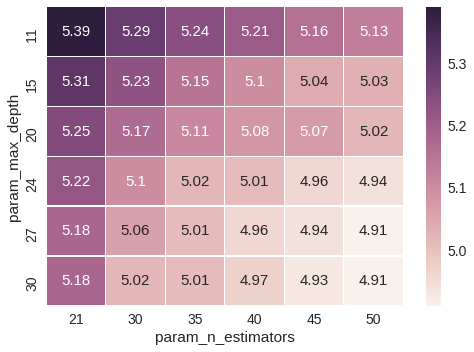

In [49]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [50]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=30 AND N_ESTIMATORS=50

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

In [0]:
xg=XGBClassifier(n_jobs=-1,max_depth=30 ,n_estimators=50)
xg.fit(train_tfidf,y_train)#fitting the model 


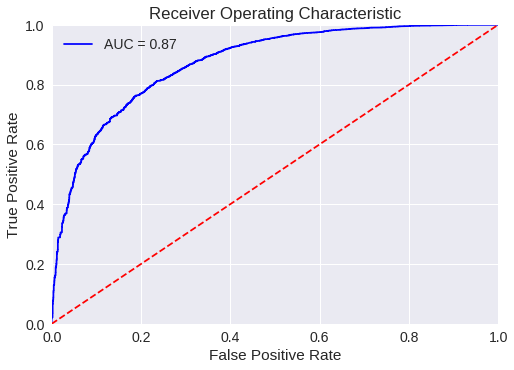

In [53]:
probs = xg.predict_proba(test_tfidf)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  87.37248689754394


In [55]:
z=rf.feature_importances_
a=z.argsort()
print('shape of wieght vector is:',a.shape)
top_features=np.take(vectorizer.get_feature_names(),a[16360:])#taking last features as they are of very high importance 

shape of wieght vector is: (16382,)


In [56]:
print(top_features)#printing the top_features
top=list(top_features)

['return' 'refund' 'receiv' 'poor' 'gross' 'money' 'best' 'thought' 'tast'
 'horribl' 'mayb' 'stale' 'love' 'threw' 'wast' 'bad' 'worst' 'terribl'
 'aw' 'would' 'great' 'disappoint']


# REPRESENTING TOP IMPORTANT FEATURES USING WORDCLOUD LIBRARY

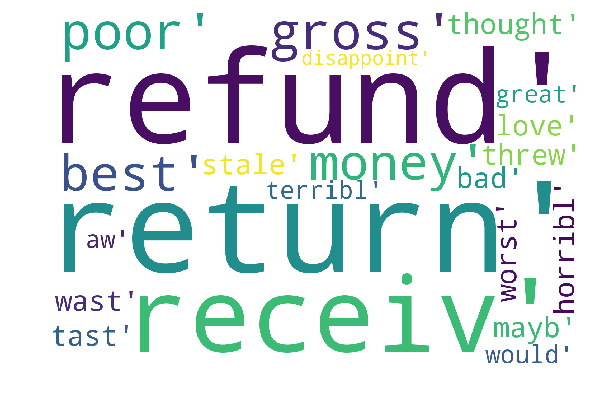

In [57]:
from wordcloud import WordCloud #here we are printing the top features using wordcloud library
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1500, height = 1000, 
                background_color ='white', 
                 
                min_font_size = 10).generate(str(top)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Accuracy on test set: 90.110%
Precision on test set: 0.905
Recall on test set: 0.991
F1-Score on test set: 0.946
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



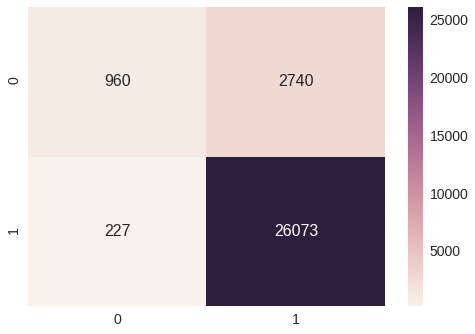

In [59]:

y_pred = xg.predict(test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')
